# **Проект "MasterCard Stock Data"**

Подготовка данных, обучение модели, сохраниние модели для создания веб приложения.


---



Загружаем нужные библиотеки:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import pickle

Загружаем файл с гитхаба.
Устанавливаем random.seed(0) для стабильности данных при перезапуске


In [2]:
url = 'https://raw.githubusercontent.com/kalilurrahman/MasterCardStockData/main/Mastercard_stock_history.csv'

mastercard_stock_history = pd.read_csv(url)

np.random.seed(0)

Первый взгляд на датафрейм, знакомимся с данным, смотрим нет ли уже вначале пропусков или еще каких проблем с данными.

На первый взгляд, все нормально.

In [3]:
mastercard_stock_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


In [4]:
mastercard_stock_history.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3867,2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
3868,2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
3869,2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0
3870,2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700,0.00,0.0
3871,2021-10-11,353.950012,354.880005,346.899994,347.149994,2766800,0.00,0.0


Проверка на наличие пустых ячеек

In [5]:
mastercard_stock_history.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Общее описание датафрейма

In [6]:
mastercard_stock_history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


Переводим все названия колонок в нижний регистр для удобства работы с ними, так же заменяем пробелы нижним подчеркиванием

In [7]:
mastercard_stock_history.columns = mastercard_stock_history.columns.str.lower().str.replace(" ", "_")

Перепроверям переведены ли названия колонок нашего датафрейма в нижний регистр и заменены ли пробелы

In [8]:
mastercard_stock_history.head()

,date,open,high,low,close,volume,dividends,stock_splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


Проверка типа данных в датафрейме

In [9]:
mastercard_stock_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3872 non-null   object 
 1   open          3872 non-null   float64
 2   high          3872 non-null   float64
 3   low           3872 non-null   float64
 4   close         3872 non-null   float64
 5   volume        3872 non-null   int64  
 6   dividends     3872 non-null   float64
 7   stock_splits  3872 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 242.1+ KB


Проверяем есть ли в колонке dividends что-то кроме 0, и видим что да, есть, хотя и 0 самое большое колличество. Думаю пока можно оставить эту колонку.

In [10]:
mastercard_stock_history.dividends.value_counts(ascending=True)

dividends
0.009       2
0.060       3
0.030       4
0.110       4
0.160       4
0.190       4
0.220       4
0.250       4
0.330       4
0.400       4
0.440       4
0.015      20
0.000    3811
Name: count, dtype: int64

Проводим такую же проверку с колонкой stock_splits. Всего одна строка отличяется. Я считаю, что эту колонку можно смело удалять из датафрейма уже сейчас вместе с date и идти дальше.

In [11]:
mastercard_stock_history.stock_splits.value_counts(ascending=True)

stock_splits
10.0       1
0.0     3871
Name: count, dtype: int64

Избавляемя от колонок stock_splits и date

In [12]:
mastercard_stock_history.drop(['stock_splits', 'date'], axis=1, inplace=True)
mastercard_stock_history.head()

,open,high,low,close,volume,dividends
0,3.748967,4.283869,3.739664,4.279217,395343000,0.0
1,4.307126,4.348058,4.103398,4.179680,103044000,0.0
2,4.183400,4.184330,3.986184,4.093164,49898000,0.0
3,4.125723,4.219679,4.125723,4.180608,30002000,0.0
4,4.179678,4.474572,4.176887,4.419686,62344000,0.0


Прологарифмируем сразу все колонки, так как в них довольно большая разница в цифрах.

In [13]:
mastercard_stock_history = np.log1p(mastercard_stock_history)

mastercard_stock_history.describe()

,open,high,low,close,volume,dividends
count,3872.000000,3872.000000,3872.000000,3872.000000,3872.000000,3872.000000
mean,4.113880,4.125734,4.101821,4.114257,15.816421,0.002053
std,1.107572,1.104450,1.110110,1.106969,0.925832,0.022283
min,1.557927,1.629724,1.555966,1.626071,13.370942,0.000000
25%,3.150477,3.162855,3.136991,3.148470,15.076660,0.000000
50%,4.274025,4.281873,4.265830,4.274665,15.589064,0.000000
75%,5.001853,5.008268,4.996009,5.001853,16.395557,0.000000
max,5.975472,5.995261,5.968062,5.980620,19.795264,0.364643


Дупликатов 0, можно двигаться дальше.

In [14]:
mastercard_stock_history.duplicated().sum()

0

Визуализируем распределение данных и их корреляции

<Axes: >

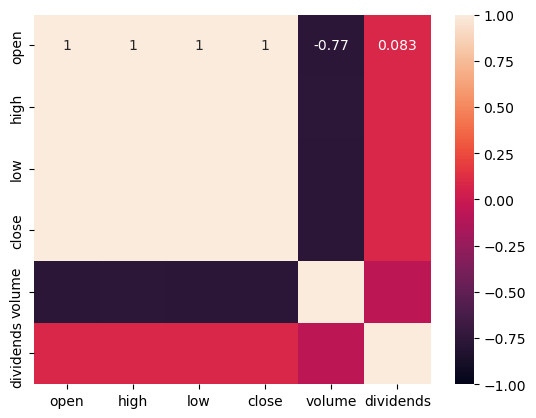

In [15]:
mastercard_stock_history_correlation = mastercard_stock_history.corr()

sns.heatmap(mastercard_stock_history_correlation, vmin=-1, vmax=1, annot=True)

Смотрим распределение нашей целевой переменной close


c:\Users\Marlen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


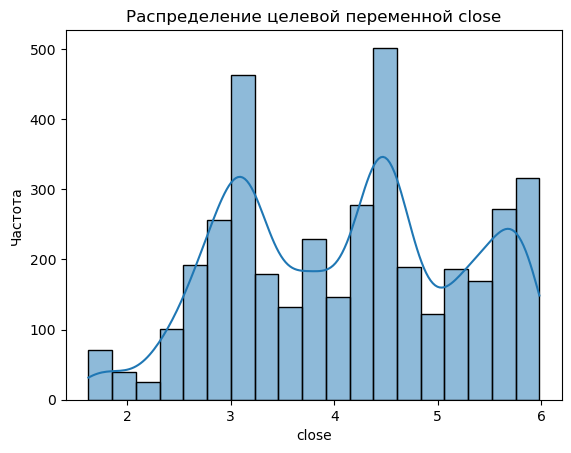

In [16]:
sns.histplot(mastercard_stock_history.close, kde=True)

plt.title('Распределение целевой переменной close')
plt.xlabel('close')
plt.ylabel('Частота')

plt.show()

In [17]:
skewness = mastercard_stock_history.close.skew()

print(f"Скошенность (асимметрия): {skewness}")

Скошенность (асимметрия): -0.05755214435181362


In [18]:
mastercard_stock_history.close.describe()

count    3872.000000
mean        4.114257
std         1.106969
min         1.626071
25%         3.148470
50%         4.274665
75%         5.001853
max         5.980620
Name: close, dtype: float64

In [19]:
X = mastercard_stock_history.drop('close', axis=1)
y = mastercard_stock_history.close

In [20]:
X.head()

,open,high,low,volume,dividends
0,1.557927,1.664659,1.555966,19.795264,0.0
1,1.669050,1.676733,1.629907,18.450667,0.0
2,1.645461,1.645641,1.606671,17.725491,0.0
3,1.634272,1.652436,1.634272,17.216775,0.0
4,1.644743,1.700114,1.644204,17.948178,0.0


In [21]:
y.describe()

count    3872.000000
mean        4.114257
std         1.106969
min         1.626071
25%         3.148470
50%         4.274665
75%         5.001853
max         5.980620
Name: close, dtype: float64

Обученеи модели

In [22]:
from sklearn.model_selection import train_test_split

# Разбиваем данные
X_train, X_test_val, y_train, y_test_val  = train_test_split(X, y, test_size=0.4, random_state=1)

In [23]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=1)

In [24]:
print(f"X_test: {len(X_test)}")
print(f"X_val: {len(X_val)}")
print(f"y_test: {len(y_test)}")
print(f"y_val: {len(y_val)}")

X_test: 774
X_val: 775
y_test: 774
y_val: 775


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.score(X_test, y_test)

0.9999430761780678

In [27]:
preds_test = model.predict(X_test)

print("-- Тестирвоание --")
print("Предсказанные данные")
print(preds_test[:5])

print()
print("Реальные данные")
print(y_test[:5].values)

print()
print("Разница:")
print(preds_test[:5] - y_test[:5].values)

-- Тестирвоание --
Предсказанные данные
[3.54899345 5.24436339 4.78320474 3.67573219 4.08951169]

Реальные данные
[3.54662911 5.24651767 4.78745798 3.68582456 4.08577196]

Разница:
[ 0.00236434 -0.00215429 -0.00425324 -0.01009237  0.00373973]


In [28]:
preds_val = model.predict(X_val)

print("-- Валидация --")
print("Предсказанные данные")
print(preds_val[:5])

print()
print("Реальные данные")
print(y_val[:5].values)

print()
print("Разница:")
print(preds_val[:5] - y_val[:5].values)

-- Валидация --
Предсказанные данные
[5.85307542 4.00727216 3.2108568  3.82469828 3.3327318 ]

Реальные данные
[5.84890237 4.00981936 3.21261565 3.82857895 3.33398799]

Разница:
[ 0.00417305 -0.00254719 -0.00175886 -0.00388067 -0.00125619]


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

print("-- Работа с тестовыми данными --")
print(f"Среднеквадратичная ошибка = {mean_squared_error(y_test, preds_test)}")
print(f"Средняя абсолютная ошибка = {mean_absolute_error(y_test, preds_test)}")
print(f"Коэффициент детерминации = {r2_score(y_test, preds_test)}")

-- Работа с тестовыми данными --
Среднеквадратичная ошибка = 7.032876835124425e-05
Средняя абсолютная ошибка = 0.005512780616052172
Коэффициент детерминации = 0.9999430761780678


In [30]:
print("-- Работа с валидационными данными --")
print(f"Среднеквадратичная ошибка = {mean_squared_error(y_val, preds_val)}")
print(f"Средняя абсолютная ошибка = {mean_absolute_error(y_val, preds_val)}")
print(f"Коэффициент детерминации = {r2_score(y_val, preds_val)}")

-- Работа с валидационными данными --
Среднеквадратичная ошибка = 5.943339897335128e-05
Средняя абсолютная ошибка = 0.0055012761233082345
Коэффициент детерминации = 0.9999493755605153


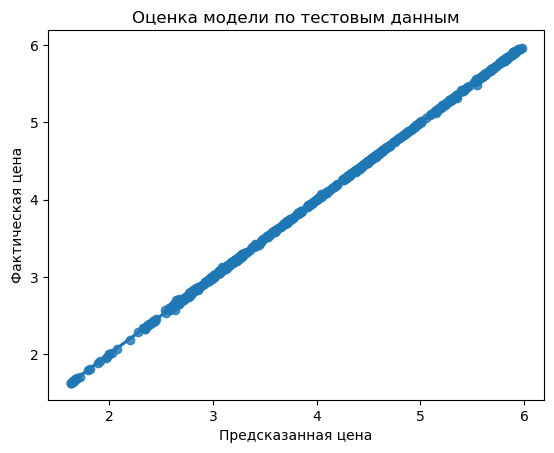

In [31]:
sns.regplot(x=preds_test, y=y_test)

plt.title("Оценка модели по тестовым данным")
plt.xlabel("Предсказанная цена")
plt.ylabel("Фактическая цена")

plt.show()

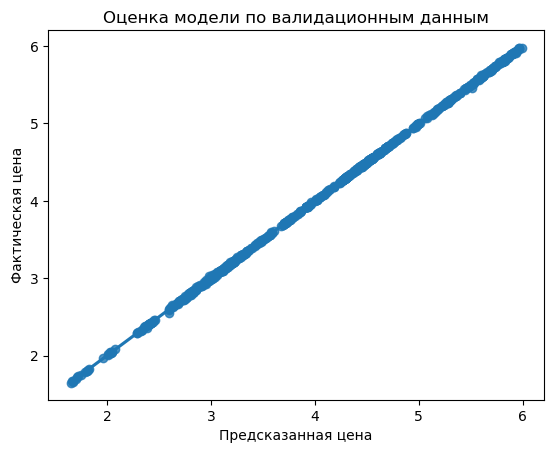

In [32]:
sns.regplot(x=preds_val, y=y_val)

plt.title("Оценка модели по валидационным данным")
plt.xlabel("Предсказанная цена")
plt.ylabel("Фактическая цена")

plt.show()

In [33]:
preds_transformed_back = np.expm1(preds_test)

y_test_transformed_back = np.expm1(y_test)

In [34]:
print("Предсказанные данные")
print(preds_transformed_back[:5])

print()

print("Реальные данные")
print(y_test_transformed_back[:5].values)

print()
print("Разница:")
print(preds_transformed_back[:5] - y_test_transformed_back[:5].values)

Предсказанные данные
[ 33.77829391 188.4951418  118.48666066  38.47755122  58.71072735]

Реальные данные
[ 33.69616318 188.90380859 118.99594879  38.87799072  58.48784256]

Разница:
[ 0.08213073 -0.40866679 -0.50928813 -0.4004395   0.22288479]


In [36]:
model_file_path = 'C:\AI\projects\streamlit_learn\project_1_mastercard.sav'
pickle.dump(model, open(model_file_path, 'wb'))